# 03/18/22 **Naive Bayes**

We can use probability to make predictions in machine learning. Perhaps the most widely used example is called the Naive Bayes algorithm. Not only is it straightforward to understand, but it also achieves surprisingly good results on a wide range of problems.

Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

$P(class \mid data) = (P(data \mid class) * P(class)) / P(data)$. Or equivalently,

$P(black \& red) = P(black)*P(red \mid black) =P(red)*P(black\mid red)$.

Given data or features $X$ with values $(x_{1}, x_{2},...x_{p}) $, we want to predict the probability of the observation in class $C_{k}$. It is computed based on:
$P(C_{k} \mid X)=P(C_{k}) ∏_{i=1}^{p} P(x_{i} \mid C_{k})$. The priors can be assumbed to be Normal or Bernouli.
For normal prior, 
$P(x_{i} \mid C_{k})=\frac{1}{\sigma_{k} \sqrt{2\pi}}exp^{-\frac{1}{2}(\frac{x_{i}-\mu_{k}}{\sigma_{k}})^{2}}$. For Bernoulli prior,
$P(x_{i} \mid C_{k})=x_{i}p+(1-x_{i})(1-p)$, here $x_{i}=1$, with probability $p=P(C_{k})$ and $x_{i}=0$ with probability $1-p$.

They are extremely fast for both training and prediction.
They provide straightforward probabilistic prediction.
They are often very easily interpretable.
They have very few (if any) tunable parameters.

Naive Bayes classifier is based on the Bayes’ Theorem, adapted for use across different machine learning problems. These include classification, clustering, and network analysis. 

Gaussian: It is used in classification and it assumes that features follow a normal distribution.

Bernoulli: the binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Multinomial Naive Bayes: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number $x_{i}$ is observed over the n trials”.

Naive Bayes' underlying assumption is that the predictors X (attributes / independent variables) are independent of each other; although in real practice, it does not hold, but results still good.

Multi class Prediction: This algorithm is also well known for multi class prediction feature; we can predict the probability of multiple classes of target variable or responses y.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)

Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not.

Zero Probability Problem.


# **Import packages**

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples

from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB,CategoricalNB


from sklearn.metrics import classification_report, confusion_matrix #Import scikit-learn metrics module for accuracy calculation
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# **Plot Demo of NB**

In [ ]:
mu1, mu2,sigma = -1, 1, 0.2 # mean and standard deviation
n=100
s1 = np.random.normal(mu1, sigma, n)
s2 = np.random.normal(mu2, sigma, n)
s1[:100]=-5+s1[:100]*2
s2[100:]=1+s2[100:]
#X = np.random.uniform(-2,2, n)

plt.scatter(s1,s2, s=50, cmap='RdBu');

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label) #label=0, 1
    mu, std = X[mask].mean(0), X[mask].std(0) #compute the mean and standard deviation
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1) #product of  element in the np array
    Pm = np.ma.masked_array(P, P < 0.03) #those with P<0.03 are masked as Invalid values and will not be used.
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)


In [ ]:

model = BernoulliNB(alpha=2)
model.fit(X, y)

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
model = GaussianNB()

model.fit(X, y)

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

# **Diabete data**

In [ ]:
import pandas as pd
#read in the data using pandas
filein="https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(filein)
#check data has been read in properly
df.head()

In [10]:
X = df.drop(columns=['Outcome'])
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
gnb = GaussianNB()
#gnb = BernoulliNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.78
Accuracy of Decision Tree classifier on test set: 0.71


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=cnf_matrix,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
all_sample_title = 'Accuracy Score: {0}'.format(round(gnb.score(X_test, y_test),4))
plt.title(all_sample_title, size = 15)
plt.show()

#**Multinomial Naive Bayes**

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

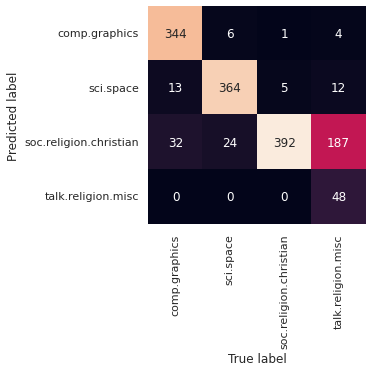

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

# **HW, Wine data set**

In [13]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [ ]:
wine.data.view()

In [ ]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [18]:
from google.colab import files
files.upload()

{}

In [ ]:
df= pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()
df_2=df.copy()

In [ ]:
df_2.head()

In [ ]:
df_2.loc[df_2.v1 == 'spam', 'label'] = 0
df_2.loc[df_2.v1 == 'ham', 'label'] = 1

df_2 = df_2.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],  axis=1)

df_2 = df_2.rename(index=str, columns={"v2": "text"})
df_2

In [ ]:
df_2.shape

In [ ]:
df_2.groupby('label').describe()# 747 spam, 4825 ham, total 5572

In [ ]:
X = df_2['text']
Y = df_2['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state = 42)

In [ ]:
# For TF-IDF vectorisation

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = CountVectorizer(decode_error='ignore',stop_words='english')
X_cv_train = count_vectorizer.fit_transform(X_train)
print(count_vectorizer.get_feature_names_out())
print(count_vectorizer.get_feature_names_out().shape)
X_cv_test = count_vectorizer.transform(X_test)
X_ = count_vectorizer.transform(X)
X_.shape

In [ ]:
tfidf = TfidfVectorizer(decode_error='ignore',stop_words='english')
X_tf_train = tfidf.fit_transform(X_train)
X_tf_test = tfidf.transform(X_test)

In [ ]:
nb_cv_model = MultinomialNB()
nb_cv_model.fit(X_cv_train, Y_train)
print("Training Accuracy:", nb_cv_model.score(X_cv_train, Y_train))

Y_cv_pred = nb_cv_model.predict(X_cv_test)
print(f"Testing Accuracy: {sklearn.metrics.accuracy_score(Y_test,Y_cv_pred)}")
mat = confusion_matrix(Y_test, Y_cv_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels = ['spam', 'ham'], yticklabels = ['spam', 'ham'])

plt.xlabel('True label')
plt.ylabel('Predicted label');

In [ ]:
nb_cv_model = MultinomialNB()
nb_cv_model.fit(X_cv_train, Y_train)
print("Training Accuracy:", nb_cv_model.score(X_cv_train, Y_train))

Y_pred = nb_cv_model.predict(X_)
print(f"Testing Accuracy: {sklearn.metrics.accuracy_score(Y,Y_pred)}")
mat = confusion_matrix(Y, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels = ['spam', 'ham'], yticklabels = ['spam', 'ham'])

plt.xlabel('True label')
plt.ylabel('Predicted label');